Calculating and Setting Thresholds to Optimise Logistic Regression Performance
How to create a simple class to optimise thresholds for precision, recall, f1 score, accuracy, tpr — fpr or custom cost functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix

In [5]:

df_credit = pd.read_csv("https://raw.githubusercontent.com/grahamharrison68/Public-Github/master/Logistic%20Regression%20Thresholds/data/bank_credit.csv",sep=',')
df_credit

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Current Loan Amount,Current Credit Balance,...,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Term_Long Term,Term_Short Term
0,482087.0,6,0.0,11.0,26.3,685960.0,1.0,1.0,99999999.0,47386.0,...,0,0,0,0,0,0,0,0,0,1
1,1025487.0,10,0.0,15.0,15.3,1181730.0,0.0,0.0,264968.0,394972.0,...,0,0,0,0,0,0,0,0,1,0
2,751412.0,8,0.0,11.0,35.0,1182434.0,0.0,0.0,99999999.0,308389.0,...,0,0,0,0,0,0,0,0,0,1
3,805068.0,6,0.0,8.0,22.5,147400.0,1.0,1.0,121396.0,95855.0,...,0,0,0,0,0,0,0,0,0,1
4,776264.0,8,0.0,13.0,13.6,385836.0,1.0,0.0,125840.0,93309.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5938,2833185.0,6,0.0,18.0,21.3,280170.0,0.0,0.0,437404.0,108889.0,...,0,0,0,0,0,0,0,0,0,1
5939,1257610.0,8,0.0,14.0,16.5,821480.0,0.0,0.0,448052.0,167428.0,...,0,0,0,0,0,0,0,0,1,0
5940,402192.0,0,0.0,3.0,8.5,107866.0,0.0,0.0,129360.0,73492.0,...,0,0,0,1,0,0,0,0,0,1
5941,1533984.0,1,0.0,10.0,26.5,686312.0,0.0,0.0,444048.0,456399.0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
X = df_credit.drop('Credit Default', axis=1)
y = df_credit['Credit Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4754, 32), (1189, 32), (4754,), (1189,))

In [16]:

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
y_pred.shape

(1189,)

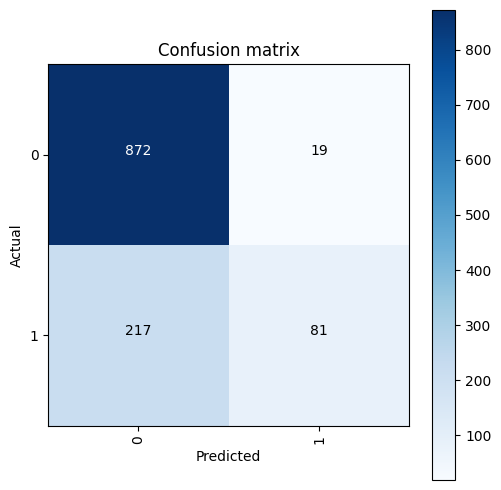

In [12]:
import matplotlib.pylab as plt
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,normalize=False):
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')


plot_confusion_matrix(confusion_matrix(y_test,y_pred>0.5),classes=["0","1"])

In [13]:

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

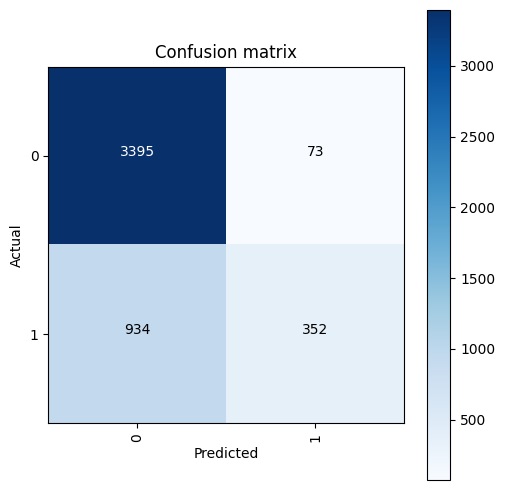

In [14]:
plot_confusion_matrix(confusion_matrix(y_train,y_pred>0.5),classes=["0","1"])

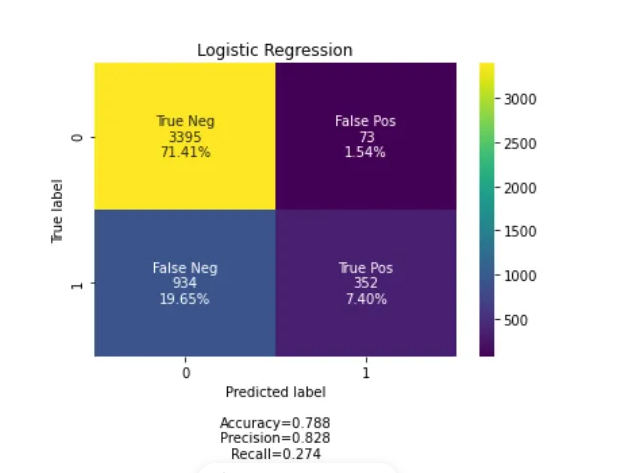

In [15]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score

In [17]:
f1_score(y_test, y_pred > 0.5)

0.4070351758793969

In [18]:
precision_score(y_test, y_pred > 0.5)

0.81

In [19]:
recall_score(y_test, y_pred > 0.5)

0.27181208053691275

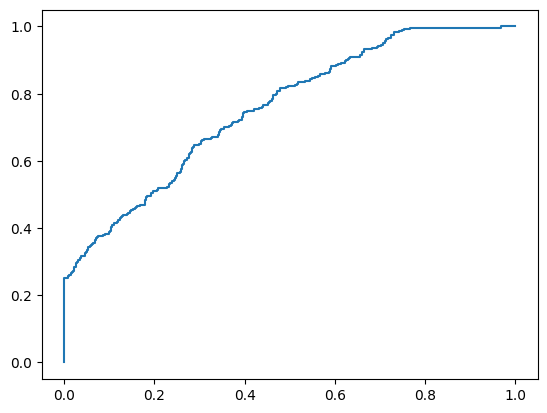

In [20]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

fpr,tpr,_ =roc_curve(y_test,lr.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr)

In [21]:
from sklearn.metrics import roc_curve,roc_auc_score
roc_auc_score(y_test,lr.predict_proba(X_test)[:,1])

0.755470438915629

In [22]:
class LogisticRegressionWithThreshold(LogisticRegression):
    def predict(self, X, threshold=None):
        if threshold == None: # If no threshold passed in, simply call the base class predict, effectively threshold=0.5
            return LogisticRegression.predict(self, X)
        else:
            y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
            y_pred_with_threshold = (y_scores >= threshold).astype(int)

            return y_pred_with_threshold
    
    def threshold_from_optimal_tpr_minus_fpr(self, X, y):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        fpr, tpr, thresholds = roc_curve(y, y_scores) 

        optimal_idx = np.argmax(tpr - fpr)

        return thresholds[optimal_idx], tpr[optimal_idx] - fpr[optimal_idx]

In [23]:
lrt = LogisticRegressionWithThreshold()
lrt.fit(X_train, y_train)

threshold, optimal_tpr_minus_fpr = lrt.threshold_from_optimal_tpr_minus_fpr(X_train, y_train)
y_pred = lrt.predict(X_train, threshold)

threshold, optimal_tpr_minus_fpr

(0.3126018200532793, 0.3383474055618039)

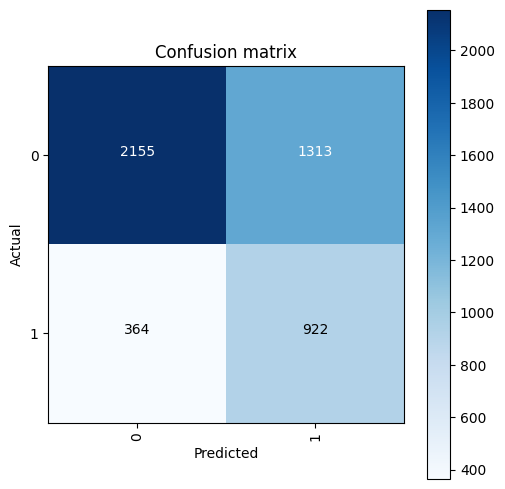

In [24]:
plot_confusion_matrix(confusion_matrix(y_train,y_pred>threshold),classes=["0","1"])

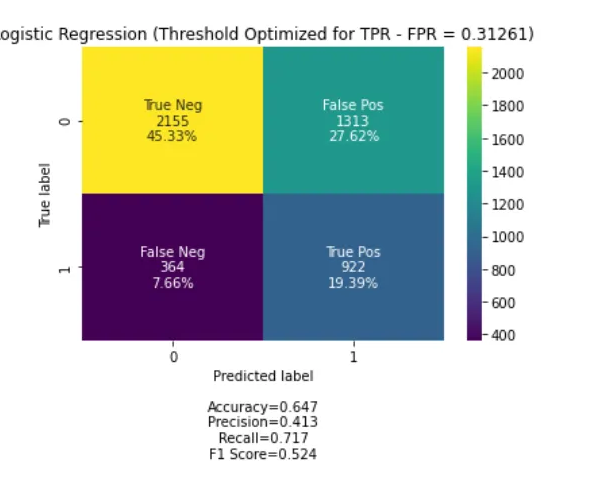

Automating the Threshold Calculation Take 2
This second attempt at extending the LogisticRegression class added a new method for optimising for the F1 score to produce the optimal precision and threshold values -

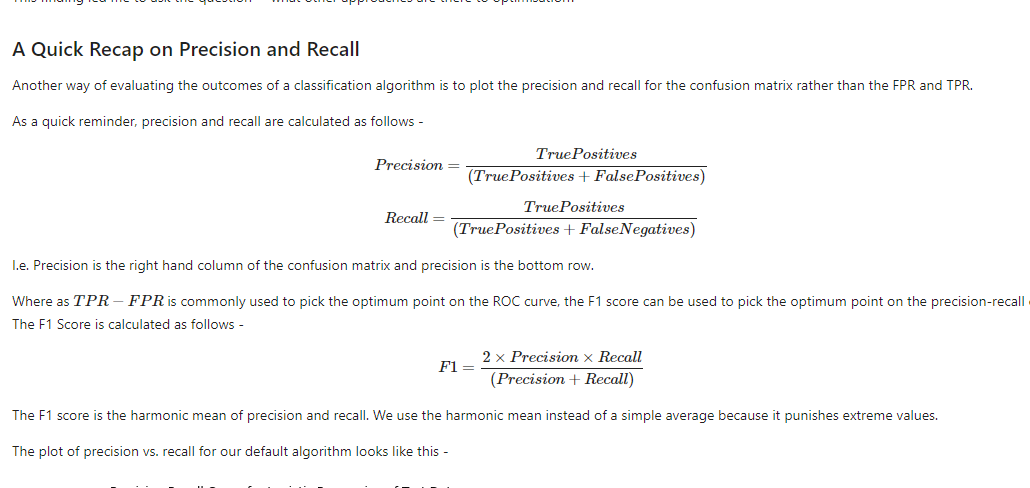

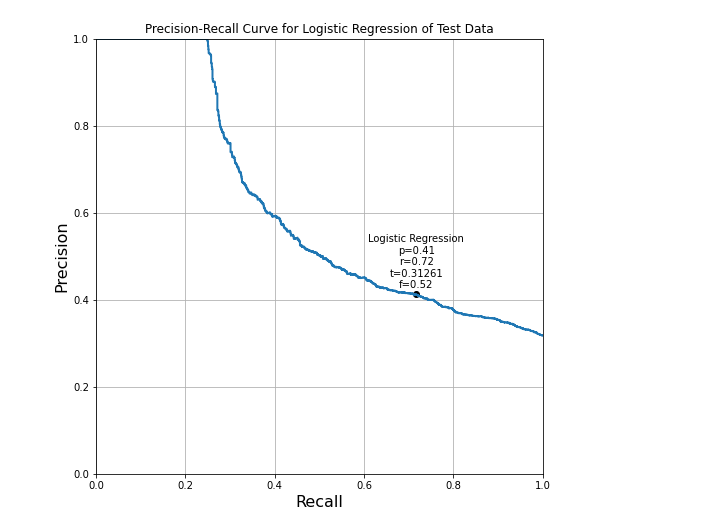

Here we can see that the optimum (i.e. the maximum) F1 score is 0.5237148537347345 with the optimum precision and recall being 0.41 and 0.72 respectively. The threshold that would produce this outcome from the algorithm is 0.3126109044627986

In [31]:
class LogisticRegressionWithThreshold(LogisticRegression):
    def predict(self, X, threshold=None):
        if threshold == None: # If no threshold passed in, simply call the base class predict, effectively threshold=0.5
            return LogisticRegression.predict(self, X)
        else:
            y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
            y_pred_with_threshold = (y_scores >= threshold).astype(int)

            return y_pred_with_threshold
    
    def threshold_from_optimal_tpr_minus_fpr(self, X, y):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        fpr, tpr, thresholds = roc_curve(y, y_scores) 

        optimal_idx = np.argmax(tpr - fpr)

        return thresholds[optimal_idx], tpr[optimal_idx] - fpr[optimal_idx]
    
    def threshold_from_optimal_f_score(self, X, y):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

        fscores = (2 * precisions * recalls) / (precisions + recalls)
        
        optimal_idx = np.argmax(fscores)
        
        return thresholds[optimal_idx], fscores[optimal_idx]

Now we can easily use the new version of the class to tell me what the threshold needs to be to optimise the f1 score and then to use that value to fine-tune the algorithm for the optimum precision and recall …

In [32]:
lrt = LogisticRegressionWithThreshold()
lrt.fit(X_train, y_train)

threshold, optimal_f1_score = lrt.threshold_from_optimal_f_score(X_train, y_train)
y_pred = lrt.predict(X_train, threshold)

threshold, optimal_f1_score

(0.3126018200532793, 0.5237148537347345)

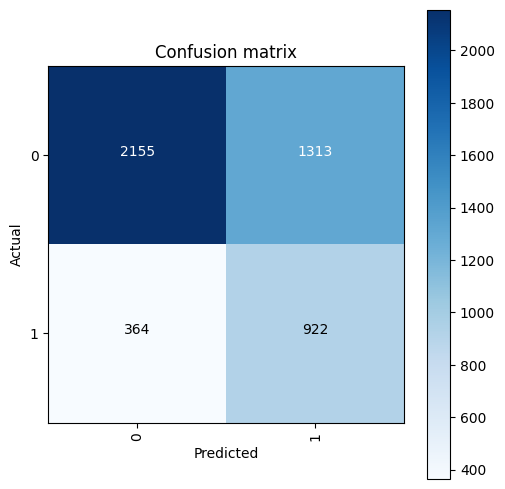

In [33]:
plot_confusion_matrix(confusion_matrix(y_train,y_pred>threshold),classes=["0","1"])

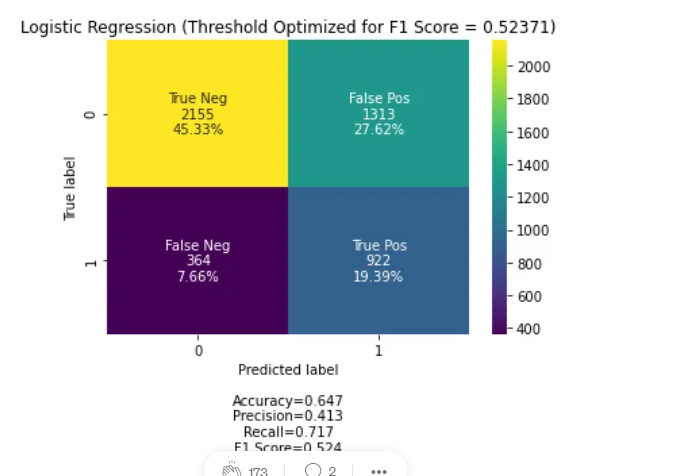

This version has significantly reduced the false negatives and represents the maximum possible optimisation of precision and recall.

Now imagine I took the new model back to the management team at the bank and they said "Well, that is an improvement but we absolutely have to have a recall of 90% for this model to be effective".

Remember, recall is 
 and at the moment this model has 922 / (364+922) = 71.7%.

We would need to explain to the management team that recall and precision are trade offs so if the model is tuned for 90% recall the precision must decrease but if that were acceptable, how could this be achieved?

This version has significantly reduced the false negatives and represents the maximum possible optimisation of precision and recall.

Now imagine I took the new model back to the management team at the bank and they said “Well, that is an improvement but we absolutely have to have a recall of 90% for this model to be effective”.

Remember, recall is 𝑇𝑃/(𝑇𝑃+𝐹𝑁) and at the moment this model has 922 / (364+922) = 71.7%.

We would need to explain to the management team that recall and precision are trade offs so if the model is tuned for 90% recall the precision must decrease but if that were acceptable, how could this be achieved?

Automating the Threshold Calculation Take 3


This third attempt adds two new methods to calculate the required threshold for a given specific recall (and precision) which can now be used to achieve the performance requested by the management team -

In [35]:
class LogisticRegressionWithThreshold(LogisticRegression):
    def predict(self, X, threshold=None):
        if threshold == None: # If no threshold passed in, simply call the base class predict, effectively threshold=0.5
            return LogisticRegression.predict(self, X)
        else:
            y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
            y_pred_with_threshold = (y_scores >= threshold).astype(int)

            return y_pred_with_threshold
    
    def threshold_from_optimal_tpr_minus_fpr(self, X, y):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        fpr, tpr, thresholds = roc_curve(y, y_scores) 

        optimal_idx = np.argmax(tpr - fpr)

        return thresholds[optimal_idx], tpr[optimal_idx] - fpr[optimal_idx]
    
    def threshold_from_optimal_f_score(self, X, y):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

        fscores = (2 * precisions * recalls) / (precisions + recalls)
        
        optimal_idx = np.argmax(fscores)
        
        return thresholds[optimal_idx], fscores[optimal_idx]
        
    def threshold_from_desired_precision(self, X, y, desired_precision=0.9):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

        desired_precision_idx = np.argmax(precisions >= desired_precision)
        
        return thresholds[desired_precision_idx], recalls[desired_precision_idx]

    def threshold_from_desired_recall(self, X, y, desired_recall=0.9):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

        desired_recall_idx = np.argmin(recalls >= desired_recall)
        
        return thresholds[desired_recall_idx], precisions[desired_recall_idx]

In [36]:
lrt = LogisticRegressionWithThreshold()
lrt.fit(X_train, y_train)

threshold, precision = lrt.threshold_from_desired_recall(X_train, y_train, 0.9)
y_pred = lrt.predict(X_train, threshold)

threshold, precision

(0.19140017269625006, 0.35382262996941893)

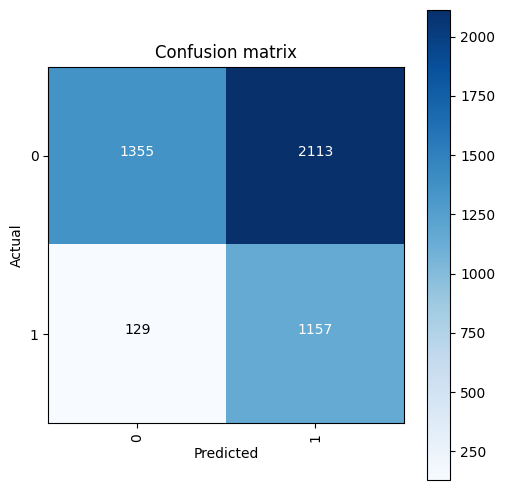

In [37]:
plot_confusion_matrix(confusion_matrix(y_train,y_pred>threshold),classes=["0","1"])

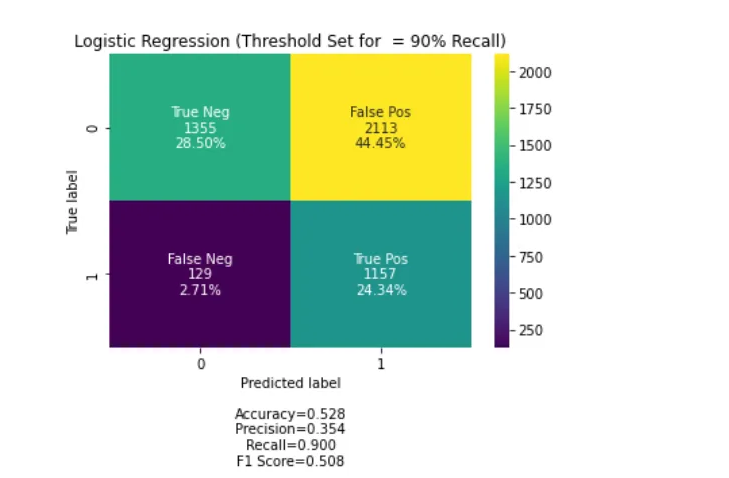

We can see that the recall requested by the management team has been achieved and that as a result the precision has been traded off from 41.3% to 35.4%.

Automating the Threshold Calculation Take 4

At this point, I was getting rather carried away and I wanted a version of the optimisation that would implement a custom cost function.

Let’s suppose the management team now give us the following new information -

Every true negative means we can sell £10,000 of additional credit products to customers who will not default.

Every false positive costs us £1,000 because we could have engaged those customers but instead, we avoided them.

Every false negative costs us £1,500 because we failed to intervene and stop those customers defaulting.

Every true positive helps us to prevent credit default and each one generates £20,000 of new income.

A “cost function” to implement this can easily be constructed -

In [38]:
def default_cost_function(tn, fp, fn, tp):
    cost = 0
    
    cost += (tn * -10000) 
    cost += (fp * 1000) 
    cost += (fn * 1500) 
    cost += (tp * -20000) 
    
    return cost

In [39]:
class LogisticRegressionWithThreshold(LogisticRegression):
    def predict(self, X, threshold=None):
        if threshold == None: # If no threshold passed in, simply call the base class predict, effectively threshold=0.5
            return LogisticRegression.predict(self, X)
        else:
            y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
            y_pred_with_threshold = (y_scores >= threshold).astype(int)

            return y_pred_with_threshold
    
    def threshold_from_optimal_tpr_minus_fpr(self, X, y):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        fpr, tpr, thresholds = roc_curve(y, y_scores) 

        optimal_idx = np.argmax(tpr - fpr)

        return thresholds[optimal_idx], tpr[optimal_idx] - fpr[optimal_idx]
    
    def threshold_from_optimal_f_score(self, X, y):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

        fscores = (2 * precisions * recalls) / (precisions + recalls)
        
        optimal_idx = np.argmax(fscores)
        
        return thresholds[optimal_idx], fscores[optimal_idx]
        
    def threshold_from_desired_precision(self, X, y, desired_precision=0.9):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

        desired_precision_idx = np.argmax(precisions >= desired_precision)
        
        return thresholds[desired_precision_idx], recalls[desired_precision_idx]

    def threshold_from_desired_recall(self, X, y, desired_recall=0.9):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

        desired_recall_idx = np.argmin(recalls >= desired_recall)
        
        return thresholds[desired_recall_idx], precisions[desired_recall_idx]
    
    def threshold_from_cost_function(self, X, y, cost_function):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

        costs = []
        tns = []
        fps = []
        fns = []
        tps = []
        
        for threshold in thresholds:
            y_pred_with_threshold = (y_scores >= threshold).astype(int)
            tn, fp, fn, tp = confusion_matrix(y, y_pred_with_threshold).ravel()
            costs.append(cost_function(tn, fp, fn, tp))
            tns.append(tn), fps.append(fp), fns.append(fn), tps.append(tp)

        df_cost = pd.DataFrame({'precision':precisions[:-1], 'recall':recalls[:-1], 'threshold':thresholds, 'cost':costs, 'tn':tns, 'fp':fps, 'fn':fns, 'tp':tps})
        
        min_cost = df_cost['cost'].min()
        threshold = df_cost[df_cost['cost']==min_cost].iloc[0]['threshold']

        return threshold, min_cost, df_cost

In [40]:

lrt = LogisticRegressionWithThreshold()
lrt.fit(X_train, y_train)

threshold, min_cost, df_cost = lrt.threshold_from_cost_function(X_train, y_train, default_cost_function)
y_pred = lrt.predict(X_train, threshold)

threshold, min_cost

(0.43243411360511563, -40033500)

In [41]:
df_cost

,precision,recall,threshold,cost,tn,fp,fn,tp
0,0.270509,1.000000,1.452647e-75,-22252000,0,3468,0,1286
1,0.270566,1.000000,6.985177e-12,-22263000,1,3467,0,1286
2,0.270623,1.000000,6.065475e-10,-22274000,2,3466,0,1286
3,0.270680,1.000000,1.437545e-09,-22285000,3,3465,0,1286
4,0.270737,1.000000,8.472886e-08,-22296000,4,3464,0,1286
...,...,...,...,...,...,...,...,...
4749,1.000000,0.003888,9.862414e-01,-32858500,3468,0,1281,5
4750,1.000000,0.003110,9.863368e-01,-32837000,3468,0,1282,4
4751,1.000000,0.002333,9.865206e-01,-32815500,3468,0,1283,3
4752,1.000000,0.001555,9.866866e-01,-32794000,3468,0,1284,2


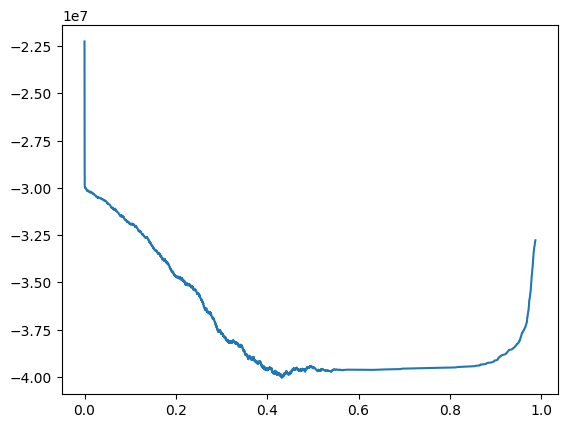

In [43]:
import matplotlib.pyplot as plt
plt.plot(df_cost.threshold,df_cost.cost)

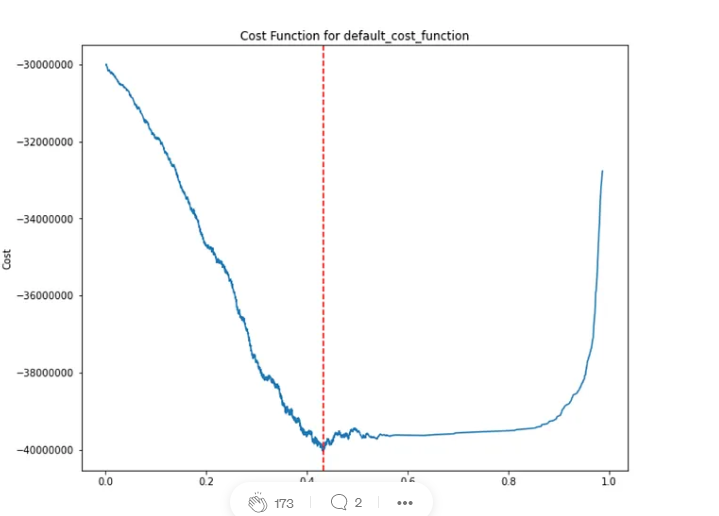

Automating the Threshold Calculation - Final Version

Given that I had realised that the threshold for optimal accuracy could be calculated using a very similar approach to that for a custom cost function, I thought I would add that into the final version.

After all, many of the data science competitions do evaluate based on accuracy even though I had come to consider that it is not always, and in fact not often, the best measure of effectiveness of a classification algorithm.

That being said when I plugged the threshold for optimum accuracy calculated using the training data into the test data it lifted the accuracy measure of the predictions by a whole 1% and in a data science competition that might just make a difference!

The final version of the LogisticRegressionWithThreshold class adds an new method to calculate the threshold needed to optimize accuracy -

In [44]:
class LogisticRegressionWithThreshold(LogisticRegression):
    def predict(self, X, threshold=None):
        if threshold == None: # If no threshold passed in, simply call the base class predict, effectively threshold=0.5
            return LogisticRegression.predict(self, X)
        else:
            y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
            y_pred_with_threshold = (y_scores >= threshold).astype(int)

            return y_pred_with_threshold
    
    def threshold_from_optimal_tpr_minus_fpr(self, X, y):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        fpr, tpr, thresholds = roc_curve(y, y_scores) 

        optimal_idx = np.argmax(tpr - fpr)

        return thresholds[optimal_idx], tpr[optimal_idx] - fpr[optimal_idx]
    
    def threshold_from_optimal_f_score(self, X, y):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

        fscores = (2 * precisions * recalls) / (precisions + recalls)
        
        optimal_idx = np.argmax(fscores)
        
        return thresholds[optimal_idx], fscores[optimal_idx]
        
    def threshold_from_desired_precision(self, X, y, desired_precision=0.9):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

        desired_precision_idx = np.argmax(precisions >= desired_precision)
        
        return thresholds[desired_precision_idx], recalls[desired_precision_idx]

    def threshold_from_desired_recall(self, X, y, desired_recall=0.9):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

        desired_recall_idx = np.argmin(recalls >= desired_recall)
        
        return thresholds[desired_recall_idx], precisions[desired_recall_idx]
    
    def threshold_from_cost_function(self, X, y, cost_function):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

        costs = []
        tns = []
        fps = []
        fns = []
        tps = []
        
        for threshold in thresholds:
            y_pred_with_threshold = (y_scores >= threshold).astype(int)
            tn, fp, fn, tp = confusion_matrix(y, y_pred_with_threshold).ravel()
            costs.append(cost_function(tn, fp, fn, tp))
            tns.append(tn), fps.append(fp), fns.append(fn), tps.append(tp)

        df_cost = pd.DataFrame({'precision':precisions[:-1], 'recall':recalls[:-1], 'threshold':thresholds, 'cost':costs, 'tn':tns, 'fp':fps, 'fn':fns, 'tp':tps})
        
        min_cost = df_cost['cost'].min()
        threshold = df_cost[df_cost['cost']==min_cost].iloc[0]['threshold']

        return threshold, min_cost, df_cost
    
    def threshold_from_optimal_accuracy(self, X, y):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        precisions, recalls, thresholds = precision_recall_curve(y, y_scores)
        
        accuracies = []
        tns = []
        fps = []
        fns = []
        tps = []

        for threshold in thresholds:
            y_pred_with_threshold = (y_scores >= threshold).astype(int)
            tn, fp, fn, tp = confusion_matrix(y, y_pred_with_threshold).ravel()

            accuracies.append((tp+tn)/(tn+fp+fn+tp))
            tns.append(tn), fps.append(fp), fns.append(fn), tps.append(tp)
        
        df_accuracy = pd.DataFrame({'threshold':thresholds, 'accuracy':accuracies, 'tn':tns, 'fp':fps, 'fn':fns, 'tp':tps})

        max_accuracy = df_accuracy['accuracy'].max()
        threshold = df_accuracy[df_accuracy['accuracy']==max_accuracy].iloc[0]['threshold']

        return threshold, max_accuracy, df_accuracy

In [45]:
lrt = LogisticRegressionWithThreshold()
lrt.fit(X_train, y_train)

threshold, max_accuracy, df_accuracy = lrt.threshold_from_optimal_accuracy(X_train, y_train)
y_pred = lrt.predict(X_train, threshold)

threshold, max_accuracy

(0.5654493752905512, 0.7968026924694994)

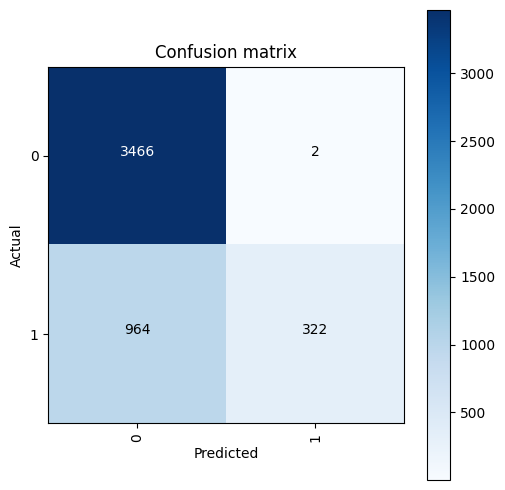

In [46]:
plot_confusion_matrix(confusion_matrix(y_train,y_pred>threshold),classes=["0","1"])

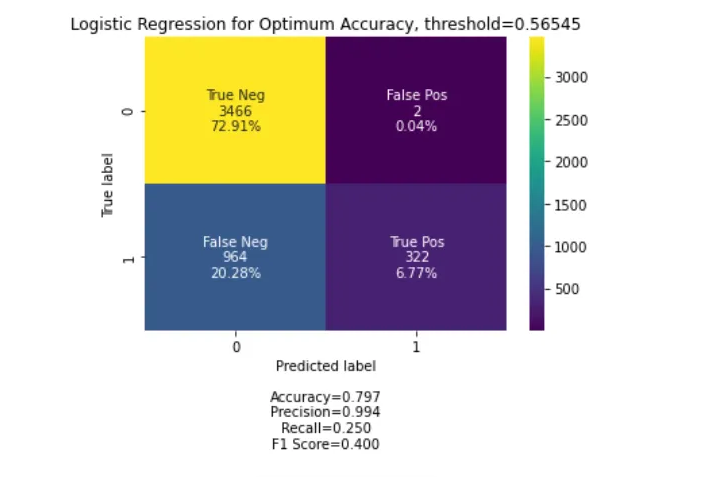

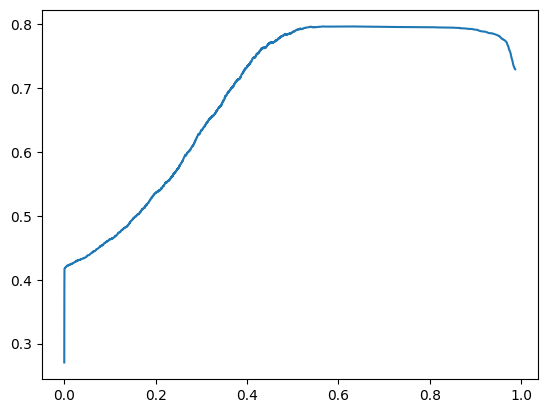

In [47]:
import matplotlib.pyplot as plt
plt.plot(df_accuracy.threshold,df_accuracy.accuracy)

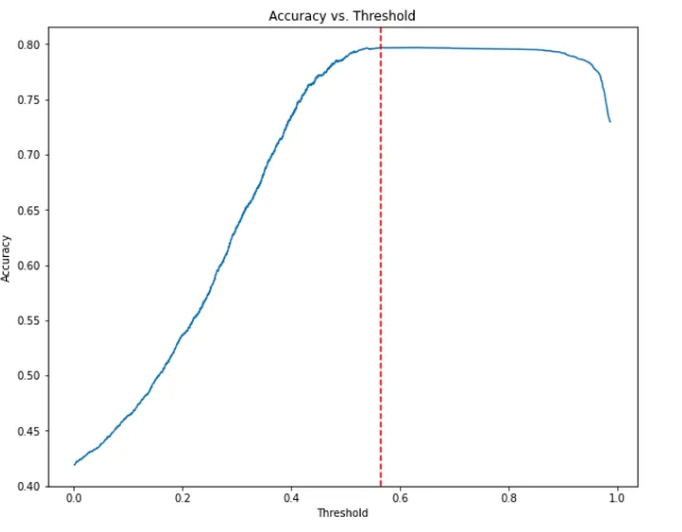

Conclusion

We have seen that there are many ways to optimise a logistic regression which incidentally can be applied to other classification algorithms. These optimisations include finding and setting thresholds for the optimisation of precision, recall, f1 score, accuracy, tpr — fpr or custom cost functions.

We have also seen that the chosen optimisation is heavily dependent on the desired business outcomes.

We have seen that the LogisticRegression class in sklearn.linear_model does not have a way to set the threshold so that the algorithm can be optimised but that we can use the LogististicRegressionWithThreshold class developed in this article to give us instant access to all the functionality necessary to tune the base algorithm according to the desired business outcomes.

The full code can be found on GitHub using this link

https://towardsdatascience.com/calculating-and-setting-thresholds-to-optimise-logistic-regression-performance-c77e6d112d7e

https://github.com/grahamharrison68/Public-Github/blob/master/Logistic%20Regression%20Thresholds/Logistic%20Regression%20Thresholds.ipynb

https://www.kaggle.com/code/kapturovalexander/kapturov-geekbrains-loan-default-prediction-comp